# Imports

In [7]:
import sys

stdout = sys.stdout

import htsexperimentation as htsx
import tsaugmentation as tsag
import properscoring as ps
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


sys.stdout = stdout
sns.set()
plt.rcParams.update({'font.size': 22})

# Parameters

In [8]:
datasets=['prison']

# Loading data
data = tsag.preprocessing.PreprocessDatasets('prison').apply_preprocess()
true = data['predict']['data'].reshape((32, 48)).T

Number of groups: 3
	state: 8
	gender: 2
	legal: 2
Total number of series: 32
Number of points per series for train: 40
Total number of points: 48
Seasonality: 4
Forecast horizon: 8


# Calculation of CRPS - example for a single series

### GPF

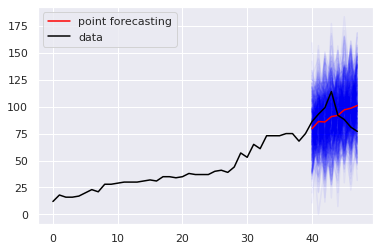

In [9]:
e = htsx.compute_results.get_output('prison', 'gpf', 'jitter')
series = 9
plt.plot(np.arange(40, 48), e['predictions']['samples']['bottom'][-8:, series, :], alpha=0.05, color='blue')
plt.plot(np.arange(40, 48), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
plt.plot(true[:,series], color='black', label='data')
plt.legend();

In [10]:
ps.crps_ensemble(true[-8:, series], e['predictions']['samples']['bottom'][-8:, series, :]).mean()

8.944075789904412

### MinT

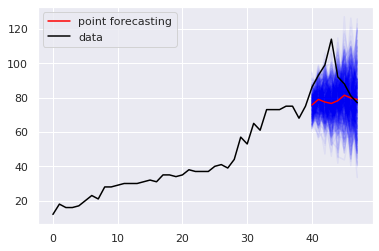

In [11]:
e = htsx.compute_results.get_output('prison', 'mint', 'jitter')
series = 9
plt.plot(np.arange(40, 48), e['predictions']['samples']['bottom'][-8:, series, :], alpha=0.05, color='blue')
plt.plot(np.arange(40, 48), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
plt.plot(true[:,series], color='black', label='data')
plt.legend();

In [12]:
ps.crps_ensemble(true[-8:, series], e['predictions']['samples']['bottom'][-8:, series, :]).mean()

10.336113343621802

### DeepAR

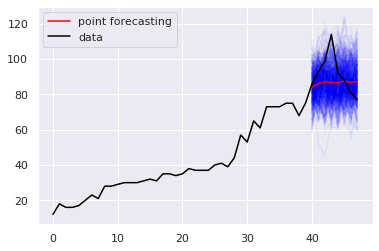

In [13]:
e = htsx.compute_results.get_output('prison', 'deepar', 'jitter')
series = 9
plt.plot(np.arange(40, 48), e['predictions']['samples']['bottom'][-8:, series, :], alpha=0.05, color='blue')
plt.plot(np.arange(40, 48), e['predictions']['points']['bottom'][:, series], alpha=1, color='red', label='point forecasting')
plt.plot(true[:,series], color='black', label='data')
plt.legend();

In [14]:
ps.crps_ensemble(true[-8:, series], e['predictions']['samples']['bottom'][-8:, series, :]).mean()

6.313351000000001

# Calculation of MASE for each algorithm

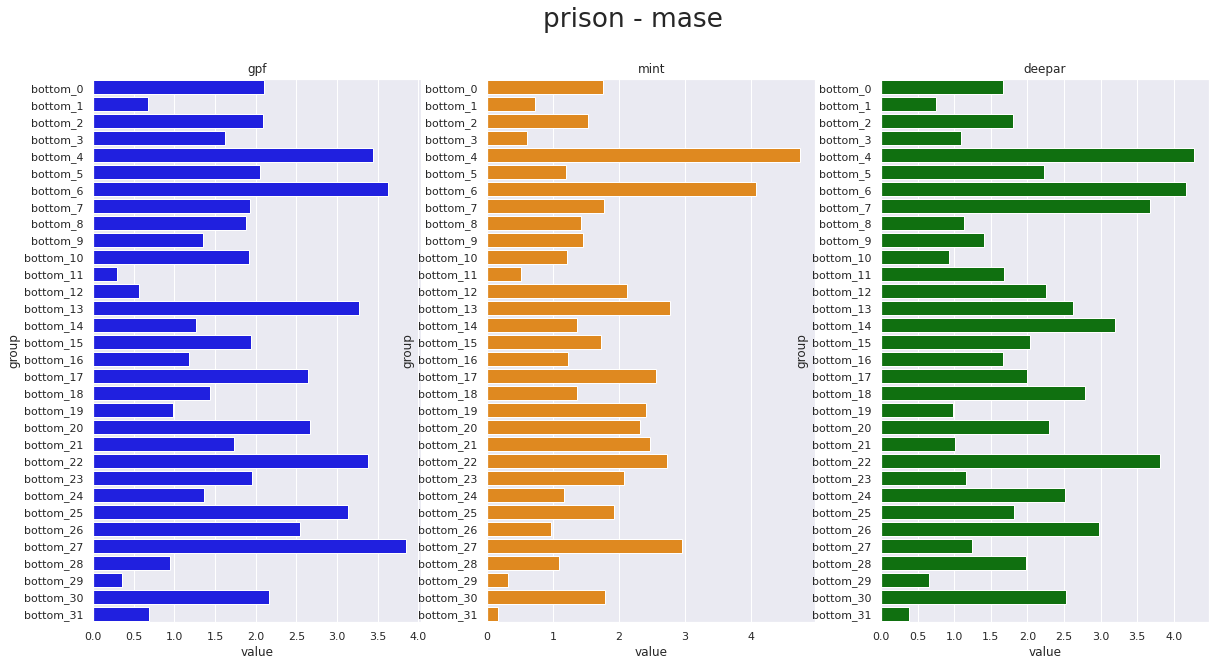

In [15]:
htsx.visualization.plot_compare_err_metric('mase', 'prison')

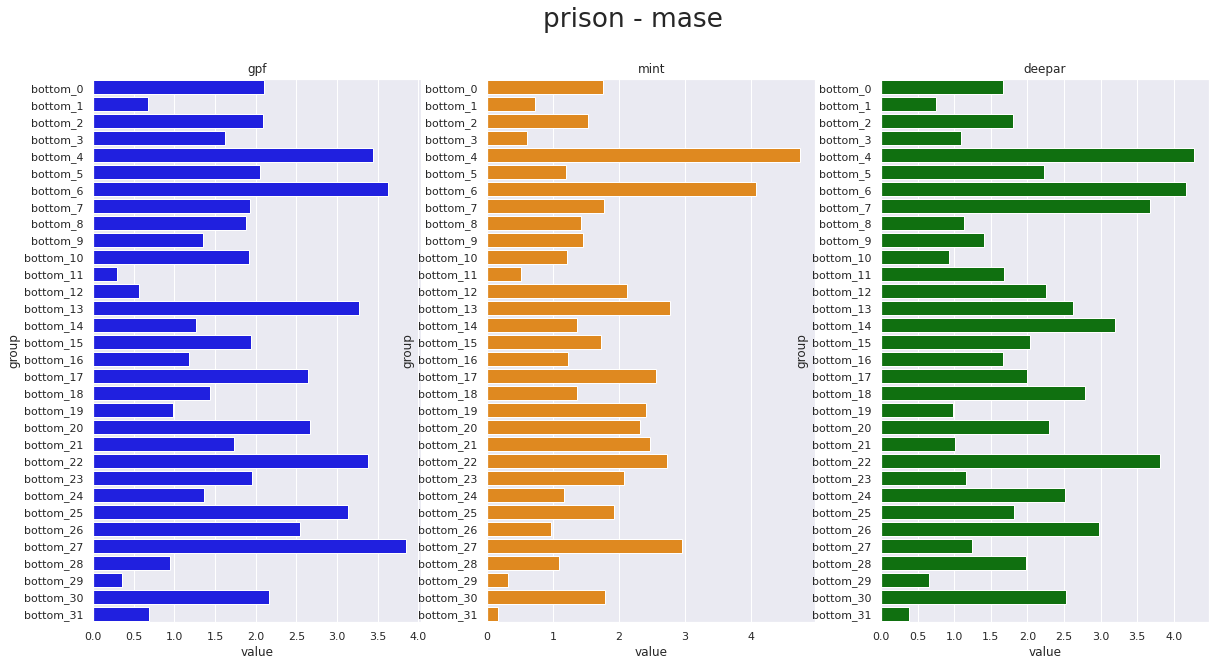

In [16]:
htsx.visualization.plot_compare_err_metric('mase', 'prison')

# Calculating aggregate results for all algorithms

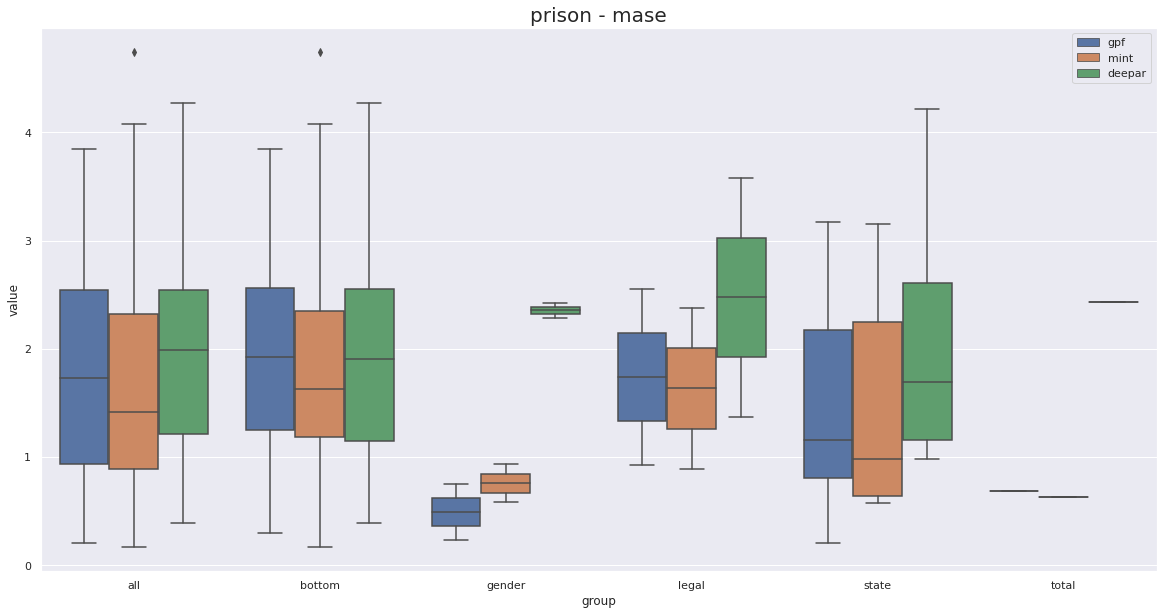

In [21]:
df_orig_list = htsx.compute_results.calculate_agg_results_all_datasets(datasets, 'mase')
htsx.visualization.boxplot_error(df_orig_list, 'mase', datasets)

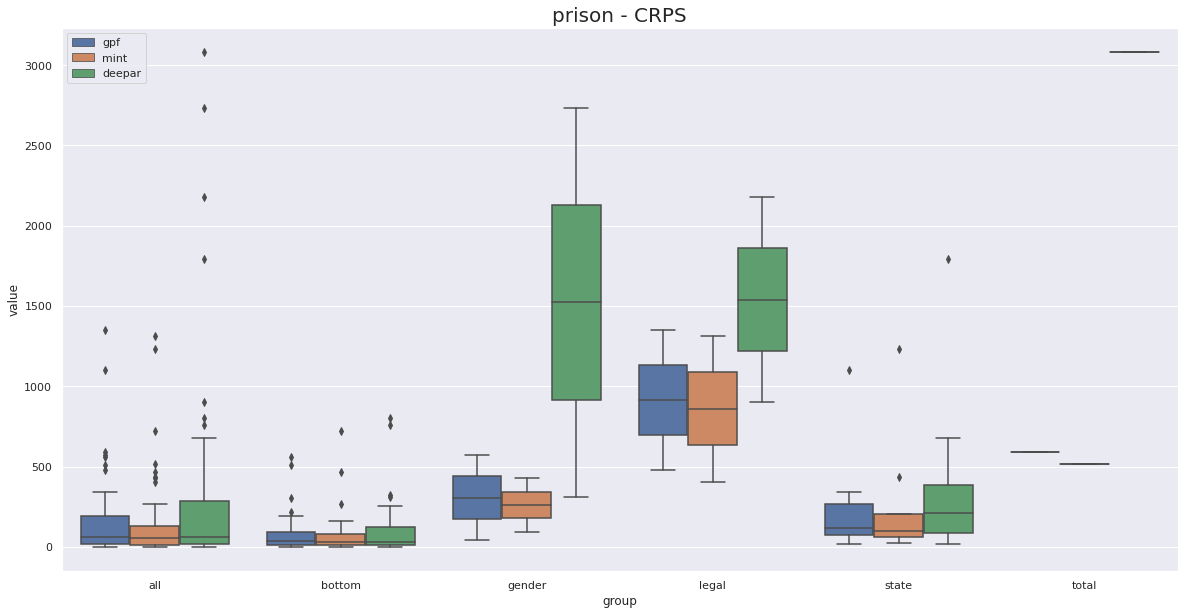

In [22]:
df_orig_list = htsx.compute_results.calculate_agg_results_all_datasets(datasets, 'CRPS')
htsx.visualization.boxplot_error(df_orig_list, 'CRPS', datasets)